In [10]:
#Load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [11]:
#Change working directory and read CSV 
os.chdir("C:/Users/lenovo/Documents")
a = pd.read_csv('J-17.csv',parse_dates = ['DailyHighDate'], index_col = 'DailyHighDate')
a.head()

,Site,WaterLevelElevation
DailyHighDate,,
2023-03-02,J17WL,635.55
2023-03-01,J17WL,635.98
2023-02-28,J17WL,636.29
2023-02-27,J17WL,636.80
2023-02-26,J17WL,637.31


In [12]:
#Check for missing values
print(a.isna().sum())

Site                   0
WaterLevelElevation    0
dtype: int64


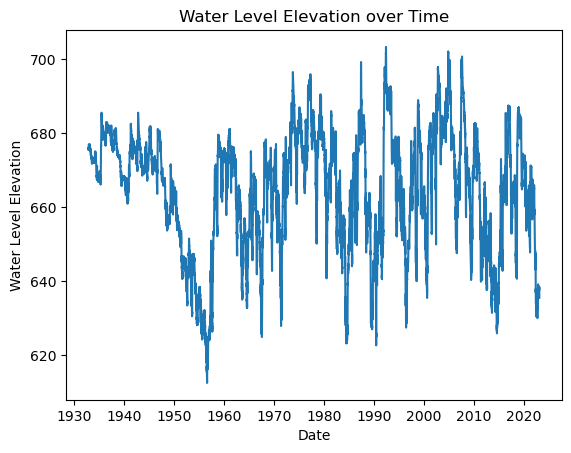

In [13]:
#Plot WaterlevelElevation over Time 
plt.plot(a['WaterLevelElevation'])
plt.xlabel('Date')
plt.ylabel('Water Level Elevation')
plt.title('Water Level Elevation over Time')
plt.show()

In [14]:
#Split the data into training and testing
train_data, test_data = train_test_split(a, test_size=0.3, shuffle=False, random_state=42)

In [15]:
#Scale the data in range of 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_sca = scaler.fit_transform(train_data[['WaterLevelElevation']])
test_data_sca = scaler.transform(test_data[['WaterLevelElevation']])

In [16]:
#Create a dataset in terms of batches with batch size of 10
Input_batch = 10
def pred_dataset(data, Input_batch):
    X, y = [], []
    for i in range(len(data) - Input_batch):
        X.append(data[i:i+Input_batch])
        y.append(data[i+Input_batch])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

X_train, y_train = pred_dataset(train_data_sca, Input_batch)
X_test, y_test = pred_dataset(test_data_sca, Input_batch)

In [17]:
#Create RNN LSTM Model
model = Sequential([
    LSTM(units=42, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=42),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=25) #fitting the model

Epoch 1/10
901/901 [==============================] - 32s 25ms/step - loss: 0.0024
Epoch 2/10
901/901 [==============================] - 25s 28ms/step - loss: 4.4452e-04
Epoch 3/10
901/901 [==============================] - 25s 28ms/step - loss: 2.4988e-04
Epoch 4/10
901/901 [==============================] - 25s 28ms/step - loss: 1.8527e-04
Epoch 5/10
901/901 [==============================] - 25s 28ms/step - loss: 1.4854e-04
Epoch 6/10
901/901 [==============================] - 25s 28ms/step - loss: 1.1224e-04
Epoch 7/10
901/901 [==============================] - 25s 28ms/step - loss: 8.4264e-05
Epoch 8/10
901/901 [==============================] - 25s 28ms/step - loss: 7.3747e-05
Epoch 9/10
901/901 [==============================] - 25s 28ms/step - loss: 6.0843e-05
Epoch 10/10
901/901 [==============================] - 25s 28ms/step - loss: 5.6722e-05


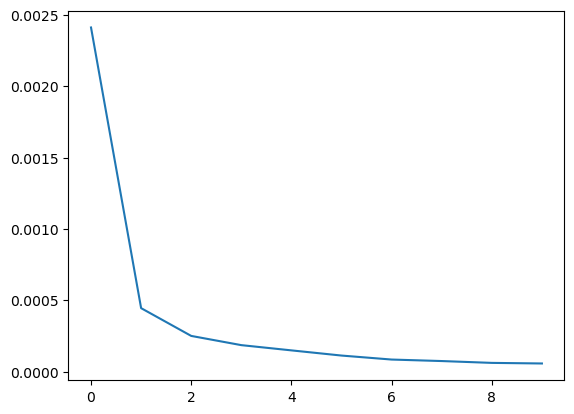

In [18]:
#Plot loss per epochs
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 42)            7392      
                                                                 
 lstm_3 (LSTM)               (None, 42)                14280     
                                                                 
 dense_1 (Dense)             (None, 1)                 43        
                                                                 
Total params: 21,715
Trainable params: 21,715
Non-trainable params: 0
_________________________________________________________________


In [20]:
#Testing the model for test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_loss = np.mean(np.square(train_pred - y_train)) #calculate the loss of traning
test_loss = np.mean(np.square(test_pred - y_test)) #calculate the loss of testing

print(f'Train loss: {train_loss:}, Test loss: {test_loss:}')

302/302 [==============================] - 2s 8ms/step
Train loss: 5.3352606422765255e-05, Test loss: 3.1999663282127894e-05


In [21]:
#Transform the values from scaler to original form 
test_pred = scaler.inverse_transform(test_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [22]:
# Compute the root mean squared error for the test set
rmse = math.sqrt(mean_squared_error(y_test, test_pred))
print(f"Root Mean Squared Error: {rmse:}")

Root Mean Squared Error: 0.45622311391652487


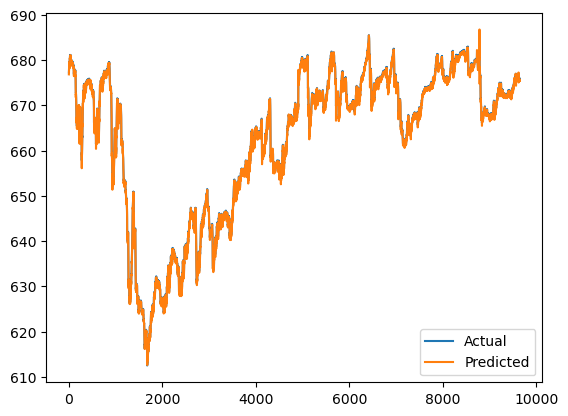

In [23]:
#Plot the actual vs predicted values 
plt.plot(y_test, label='Actual')
plt.plot(test_pred, label='Predicted')
plt.legend()
plt.show()